Name: AMirHossein Mohammadi\
ID: 99201081

In this notebook, we will be building and training LSTM and GRU to predict the stock market. You do not allow to use TensorFlow and Keras libraries.

## 1. Libraries and settings

In [2]:
# Import libraries 
# Notice that it is important that which libraries you use, so you should import
# libraries just here in your code
import numpy as np
import torch
import torch.nn as nn
import sklearn.preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import TensorDataset, DataLoader
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
import math


## 2. Load data

In [3]:
# Read data 
df = pd.read_csv('NVDA.csv')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.NVDA,D,20101004,0,11.24,11.430,11.01,11.23,18184874
1,US1.NVDA,D,20101005,0,11.48,11.500,11.29,11.32,18266877
2,US1.NVDA,D,20101006,0,11.32,11.370,10.67,10.78,25753399
3,US1.NVDA,D,20101007,0,10.82,10.840,10.38,10.70,18732301
4,US1.NVDA,D,20101008,0,10.65,10.950,10.51,10.86,16998198
...,...,...,...,...,...,...,...,...,...
2762,US1.NVDA,D,20210927,0,217.16,217.750,213.28,216.57,625939
2763,US1.NVDA,D,20210928,0,212.01,214.030,206.51,207.02,835341
2764,US1.NVDA,D,20210929,0,209.33,210.160,204.68,205.22,606902
2765,US1.NVDA,D,20210930,0,207.89,210.650,206.89,207.12,537697


# Data Describe

In [4]:
df.describe()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,2.767000e+03,2767.0,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,2.015817e+07,0.0,133.513474,135.571107,131.305725,133.543279,9.190718e+06
std,3.189016e+04,0.0,166.147275,168.671633,163.380674,166.168403,8.201193e+06
min,2.010100e+07,0.0,10.650000,10.840000,10.380000,10.700000,7.634900e+04
25%,2.013070e+07,0.0,15.870000,16.010000,15.657500,15.830000,4.690193e+06
50%,2.016040e+07,0.0,35.300000,35.570000,34.840000,35.390000,7.537088e+06
75%,2.018567e+07,0.0,203.895000,207.540000,199.240000,203.675000,1.188454e+07
max,2.021100e+07,0.0,834.590000,834.650000,814.210000,827.960000,8.447550e+07


# Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  2767 non-null   object 
 1   <PER>     2767 non-null   object 
 2   <DATE>    2767 non-null   int64  
 3   <TIME>    2767 non-null   int64  
 4   <OPEN>    2767 non-null   float64
 5   <HIGH>    2767 non-null   float64
 6   <LOW>     2767 non-null   float64
 7   <CLOSE>   2767 non-null   float64
 8   <VOL>     2767 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 194.7+ KB


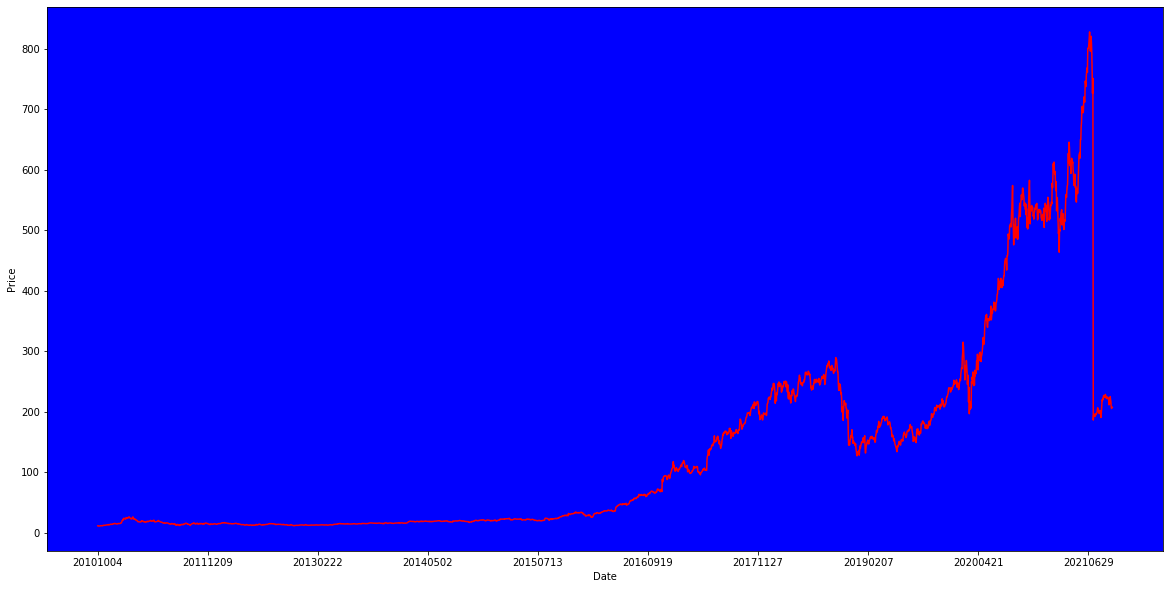

In [6]:
# Plot close prices ("<CLOSE>") based on dates ("<DATE>") 

#####################
# your code
plt.figure(figsize = (20,10))
plt.axes().set_facecolor("blue")
plt.ylabel('Price')
plt.xlabel('Date')
Date=list(df.iloc[:,2])
Price=list(df.iloc[:,7])
plt.plot(Price,color="red")
date=Date[::300]
x_ax=range(0, len(Date), 300)
plt.xticks(x_ax,date)
plt.show()
#####################


# Feature Selection

In [7]:
# Dataframe with Feature Selection
df_fs=df[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']]
df_fs

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,11.24,11.430,11.01,11.23
1,11.48,11.500,11.29,11.32
2,11.32,11.370,10.67,10.78
3,10.82,10.840,10.38,10.70
4,10.65,10.950,10.51,10.86
...,...,...,...,...
2762,217.16,217.750,213.28,216.57
2763,212.01,214.030,206.51,207.02
2764,209.33,210.160,204.68,205.22
2765,207.89,210.650,206.89,207.12


# Draw Diagram based On selected Features

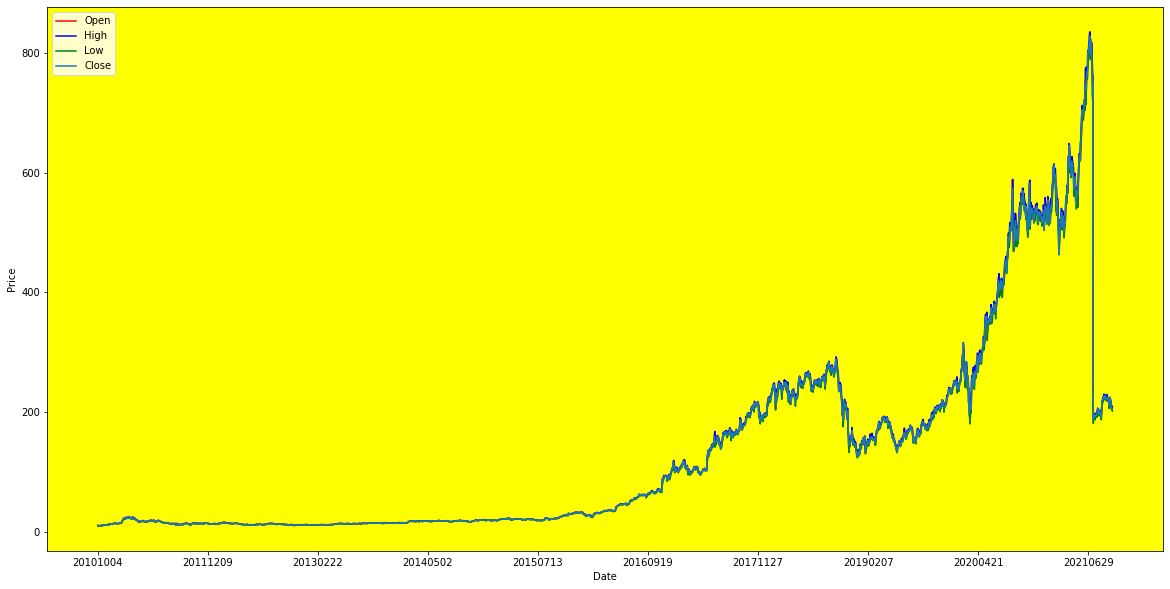

In [8]:
plt.figure(figsize = (20,10))
plt.axes().set_facecolor("yellow")
plt.ylabel('Price')
plt.xlabel('Date')
Open=list(df_fs.iloc[:,0])
High=list(df_fs.iloc[:,1])
Low=list(df_fs.iloc[:,2])
Close=list(df_fs.iloc[:,3])
plt.plot(Open,color="red",label='Open')
plt.plot(High,color="blue",label='High')
plt.plot(Low,color="green",label='Low')
plt.plot(Close,label='Close')
plt.legend(loc='upper left')
plt.xticks(range(0, len(Date), 300), Date[::300])
plt.show()

In [9]:
df_fs=df[['<CLOSE>']]
df_fs

,<CLOSE>
0,11.23
1,11.32
2,10.78
3,10.70
4,10.86
...,...
2762,216.57
2763,207.02
2764,205.22
2765,207.12


# Feature Normalization

In [10]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
df_fs['<CLOSE>'] = min_max_scaler.fit_transform(df_fs['<CLOSE>'].values.reshape(-1,1))

# Create Tast and Train Dataset

In [11]:
# function to create train, test data given stock data and sequence length
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_fs, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2166, 59, 1)
y_train.shape =  (2166, 1)
x_test.shape =  (541, 59, 1)
y_test.shape =  (541, 1)


In [12]:
x_train = torch.from_numpy(x_train)
x_train=x_train.type(torch.Tensor)
x_test = torch.from_numpy(x_test)
x_test=x_test.type(torch.Tensor)
y_train = torch.from_numpy(y_train)
y_train=y_train.type(torch.Tensor)
y_test = torch.from_numpy(y_test)
y_test=y_test.type(torch.Tensor)

## 3. Build the structure of models

In [13]:
# Build model
#####################
# you can change these parameters to get better result
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.num_layers = num_layers
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        ##################

        # your code
        hidden_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        hidden_0=hidden_0.requires_grad_().detach()
        context_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        context_0=context_0.requires_grad_().detach()
        output, (hidden_t, context_t) = self.lstm(x, (hidden_0, context_0))
        output = self.fc(output[:, -1, :])
        return output      
        ##################
    
    def backward(self):
      ################

      # your code
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

      ################
    
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        # Number of hidden layers
        self.num_layers = num_layers
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        ##################

        # your code
        hidden_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        hidden_0=hidden_0.requires_grad_().detach()
        output, (hidden_t) = self.gru(x, (hidden_0))
        output = self.fc(output[:, -1, :])
        return output

        ##################
    
    def backward(self):
      ################

      # your code
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      ################

        
        

# Define LSTM Model

In [14]:
model_LSTM = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Define Loss function and Optimizer

In [15]:
Loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_LSTM.parameters(), lr=0.01)

# Train phase

In [16]:
Epoch=50
train_loss=[]
for i in range(Epoch):
    y_pred = model_LSTM.forward(x_train)
    loss=Loss(y_pred, y_train)
    model_LSTM.backward()
    train_loss.append(loss.item())
    print("Epoch "+str(i)+":")
    print("Loss:>>>"+str(loss.item()))
    print("*********************************************************")

Epoch 0:
Loss:>>>0.015861982479691505
*********************************************************
Epoch 1:
Loss:>>>0.019948942586779594
*********************************************************
Epoch 2:
Loss:>>>0.010275990702211857
*********************************************************
Epoch 3:
Loss:>>>0.009882759302854538
*********************************************************
Epoch 4:
Loss:>>>0.011582531034946442
*********************************************************
Epoch 5:
Loss:>>>0.011875605210661888
*********************************************************
Epoch 6:
Loss:>>>0.010939138010144234
*********************************************************
Epoch 7:
Loss:>>>0.009711460210382938
*********************************************************
Epoch 8:
Loss:>>>0.008913453668355942
*********************************************************
Epoch 9:
Loss:>>>0.008840967901051044
*********************************************************
Epoch 10:
Loss:>>>0.009263794869184494
*

# Plot Loss

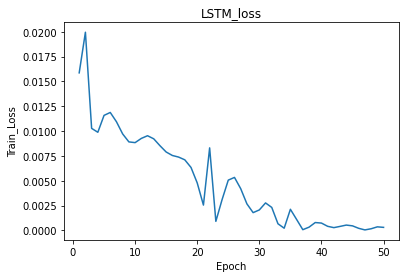

In [17]:
plt.title("LSTM_loss")
plt.ylabel('Train_Loss')
plt.xlabel('Epoch')
plt.plot(range(1, Epoch+1),train_loss)

plt.show()

# Make Prediction

In [19]:
y_pred=model_LSTM.forward(x_test)

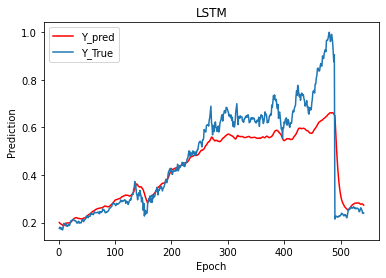

In [20]:
plt.title("LSTM")
plt.ylabel('Prediction')
plt.xlabel('Epoch')
plt.plot(range(1, 542),y_pred.detach().numpy(),color="red",label='Y_pred')
plt.plot(range(1, 542),y_test.detach().numpy(),label='Y_True')
plt.legend()
plt.show()

# root mean squared error (without Scaling)

In [25]:
rmse = math.sqrt(mean_squared_error(y_test[:,0].detach().numpy(), y_pred[:,0].detach().numpy()))
print("rmse:")
print(rmse)

rmse:
0.09798793255852468


In [27]:
df_pred_lstm = pd.DataFrame(min_max_scaler.inverse_transform(y_pred.detach().numpy()), columns = ['Close'])
df_pred_lstm

,Close
0,174.186935
1,171.855560
2,170.523376
3,169.073853
4,167.409195
...,...
536,237.905899
537,238.200012
538,237.839966
539,236.084457


# Define GRU Model

In [28]:
model_GRU = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Define Loss function and Optimizer

In [29]:
Loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_GRU.parameters(), lr=0.01)

# Training Phase 

In [30]:
Epoch=50
train_loss=[]
for i in range(Epoch):
    y_pred = model_GRU.forward(x_train)
    loss=Loss(y_pred, y_train)
    model_GRU.backward()
    train_loss.append(loss.item())
    print("Epoch "+str(i)+":")
    print("Loss:>>>"+str(loss.item()))
    print("*********************************************************")

Epoch 0:
Loss:>>>0.01012871228158474
*********************************************************
Epoch 1:
Loss:>>>0.038867831230163574
*********************************************************
Epoch 2:
Loss:>>>0.007968926802277565
*********************************************************
Epoch 3:
Loss:>>>0.020634593442082405
*********************************************************
Epoch 4:
Loss:>>>0.01726478524506092
*********************************************************
Epoch 5:
Loss:>>>0.009509856812655926
*********************************************************
Epoch 6:
Loss:>>>0.007495415862649679
*********************************************************
Epoch 7:
Loss:>>>0.009721813723444939
*********************************************************
Epoch 8:
Loss:>>>0.01109420508146286
*********************************************************
Epoch 9:
Loss:>>>0.009933564811944962
*********************************************************
Epoch 10:
Loss:>>>0.007971543818712234
****

# Train Loss

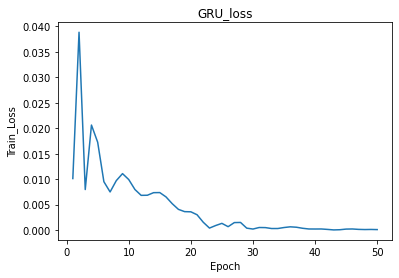

In [31]:
plt.title("GRU_loss")
plt.ylabel('Train_Loss')
plt.xlabel('Epoch')
plt.plot(range(1, Epoch+1),train_loss)

plt.show()

# Make Prediction

In [32]:
y_pred=model_GRU.forward(x_test)

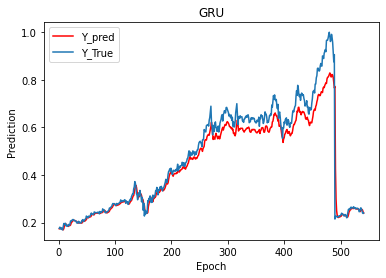

In [33]:
plt.title("GRU")
plt.ylabel('Prediction')
plt.xlabel('Epoch')
plt.plot(range(1, 542),y_pred.detach().numpy(),color="red",label='Y_pred')
plt.plot(range(1, 542),y_test.detach().numpy(),label='Y_True')
plt.legend()
plt.show()

In [34]:
rmse = math.sqrt(mean_squared_error(y_test[:,0].detach().numpy(), y_pred[:,0].detach().numpy()))
print("rmse:")
print(rmse)

rmse:
0.05588812446692761


In [35]:
df_pred_gru = pd.DataFrame(min_max_scaler.inverse_transform(y_pred.detach().numpy()), columns = ['Close'])
df_pred_gru

,Close
0,152.812027
1,152.365021
2,154.504578
3,153.776978
4,151.858704
...,...
536,219.085312
537,219.295547
538,216.934265
539,210.726364


 <div dir="rtl">
همانطور که مشخص است بر اساس نتایج داده های تست و معیار RMSE هر دو معماری تا حدی زیادی به نتایج مشابه ای دست یافته اند اما طبق تست های انجام شده در کل GRU عملکر بهتری دارد و هزینه ی کمتر و به دقت بهتری رسیده است و تا حدی اطلاعات بدست آمده در مراحل قبلی را بهتر انتقال می دهد و تا حد زیادی از مسئله ی محوشدگی گرادیان جلوگیری می کند. 
</dir>

**Bonus (5%)** \
try denoising techniques and train models again after denoising the prices. Then compare the results with previous step and explain how much improvment you can make by denoising data. 

In [47]:
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.NVDA,D,20101004,0,11.24,11.430,11.01,11.23,18184874
1,US1.NVDA,D,20101005,0,11.48,11.500,11.29,11.32,18266877
2,US1.NVDA,D,20101006,0,11.32,11.370,10.67,10.78,25753399
3,US1.NVDA,D,20101007,0,10.82,10.840,10.38,10.70,18732301
4,US1.NVDA,D,20101008,0,10.65,10.950,10.51,10.86,16998198
...,...,...,...,...,...,...,...,...,...
2762,US1.NVDA,D,20210927,0,217.16,217.750,213.28,216.57,625939
2763,US1.NVDA,D,20210928,0,212.01,214.030,206.51,207.02,835341
2764,US1.NVDA,D,20210929,0,209.33,210.160,204.68,205.22,606902
2765,US1.NVDA,D,20210930,0,207.89,210.650,206.89,207.12,537697


In [48]:
df_price=df['<CLOSE>']
df_price

0        11.23
1        11.32
2        10.78
3        10.70
4        10.86
         ...  
2762    216.57
2763    207.02
2764    205.22
2765    207.12
2766    207.23
Name: <CLOSE>, Length: 2767, dtype: float64

<AxesSubplot:xlabel='<CLOSE>'>

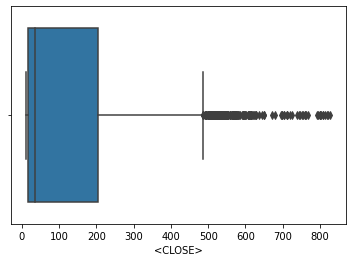

In [49]:
sns.boxplot(x=df['<CLOSE>'])

In [50]:
outliers=np.where(df['<CLOSE>']>500)
outliers

(array([2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496,
        2498, 2501, 2502, 2503, 2506, 2507, 2510, 2511, 2512, 2513, 2514,
        2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525,
        2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536,
        2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547,
        2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558,
        2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569,
        2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580,
        2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591,
        2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602,
        2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613,
        2614, 2615, 2616, 2617, 2618, 2622, 2624, 2625, 2626, 2627, 2628,
        2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639,
        2640, 2641, 2642, 2643, 2644, 

In [51]:
out_df=df.drop(df.index[outliers])
out_df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.NVDA,D,20101004,0,11.24,11.430,11.01,11.23,18184874
1,US1.NVDA,D,20101005,0,11.48,11.500,11.29,11.32,18266877
2,US1.NVDA,D,20101006,0,11.32,11.370,10.67,10.78,25753399
3,US1.NVDA,D,20101007,0,10.82,10.840,10.38,10.70,18732301
4,US1.NVDA,D,20101008,0,10.65,10.950,10.51,10.86,16998198
...,...,...,...,...,...,...,...,...,...
2762,US1.NVDA,D,20210927,0,217.16,217.750,213.28,216.57,625939
2763,US1.NVDA,D,20210928,0,212.01,214.030,206.51,207.02,835341
2764,US1.NVDA,D,20210929,0,209.33,210.160,204.68,205.22,606902
2765,US1.NVDA,D,20210930,0,207.89,210.650,206.89,207.12,537697


In [52]:
df_fs=out_df[['<CLOSE>']]
df_fs

,<CLOSE>
0,11.23
1,11.32
2,10.78
3,10.70
4,10.86
...,...
2762,216.57
2763,207.02
2764,205.22
2765,207.12


In [60]:
df_fs['<CLOSE>'] = min_max_scaler.fit_transform(df_fs['<CLOSE>'].values.reshape(-1,1))

In [61]:
x_train, y_train, x_test, y_test = load_data(df_fs, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1992, 59, 1)
y_train.shape =  (1992, 1)
x_test.shape =  (498, 59, 1)
y_test.shape =  (498, 1)


In [62]:
x_train = torch.from_numpy(x_train)
x_train=x_train.type(torch.Tensor)
x_test = torch.from_numpy(x_test)
x_test=x_test.type(torch.Tensor)
y_train = torch.from_numpy(y_train)
y_train=y_train.type(torch.Tensor)
y_test = torch.from_numpy(y_test)
y_test=y_test.type(torch.Tensor)

In [63]:
model_LSTM_outliers = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

In [64]:
Loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_LSTM_outliers.parameters(), lr=0.01)

In [65]:
Epoch=50
train_loss=[]
for i in range(Epoch):
    y_pred = model_LSTM_outliers.forward(x_train)
    loss=Loss(y_pred, y_train)
    model_LSTM_outliers.backward()
    train_loss.append(loss.item())
    print("Epoch "+str(i)+":")
    print("Loss:>>>"+str(loss.item()))
    print("*********************************************************")

Epoch 0:
Loss:>>>0.09863969683647156
*********************************************************
Epoch 1:
Loss:>>>0.0433925986289978
*********************************************************
Epoch 2:
Loss:>>>0.026868099346756935
*********************************************************
Epoch 3:
Loss:>>>0.03916451334953308
*********************************************************
Epoch 4:
Loss:>>>0.03140687942504883
*********************************************************
Epoch 5:
Loss:>>>0.025160977616906166
*********************************************************
Epoch 6:
Loss:>>>0.024182135239243507
*********************************************************
Epoch 7:
Loss:>>>0.025330662727355957
*********************************************************
Epoch 8:
Loss:>>>0.02614755369722843
*********************************************************
Epoch 9:
Loss:>>>0.025608988478779793
*********************************************************
Epoch 10:
Loss:>>>0.02375001646578312
********

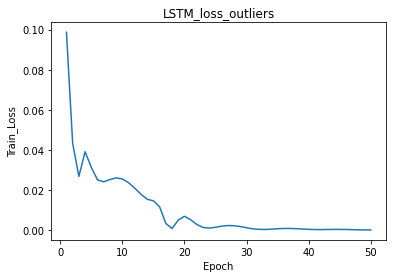

In [66]:
plt.title("LSTM_loss_outliers")
plt.ylabel('Train_Loss')
plt.xlabel('Epoch')
plt.plot(range(1, Epoch+1),train_loss)

plt.show()

In [67]:
y_pred=model_LSTM_outliers.forward(x_test)

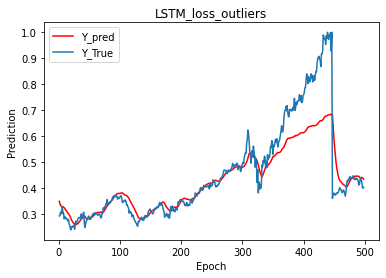

In [68]:
plt.title("LSTM_loss_outliers")
plt.ylabel('Prediction')
plt.xlabel('Epoch')
plt.plot(range(1, 499),y_pred.detach().numpy(),color="red",label='Y_pred')
plt.plot(range(1, 499),y_test.detach().numpy(),label='Y_True')
plt.legend()
plt.show()

In [69]:
rmse = math.sqrt(mean_squared_error(y_test[:,0].detach().numpy(), y_pred[:,0].detach().numpy()))
print("rmse:")
print(rmse)

rmse:
0.08788280452267379


 <div dir="rtl">
همانظور که مشخص است معیار RMSE بر اساس رویکرد جدید بهبود یافت 
</dir>